In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%run ./utils.ipynb

In [11]:
#simulation parameters
n=10                       #number of bits used in the simulation (bitstream length)
step=0.05                  #simulation time step (one pulse of duration 1 has 20 samples)
t=np.arange(0,n,step)
sigma_noise = 0.1 

Bitstream:  [1 1 0 1 0 1 0 0 0 1]


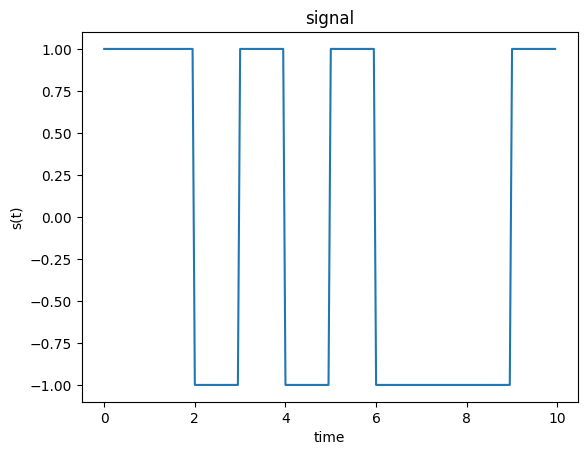

In [12]:
# bitstream = np.random.randint(0,2,10)
bitstream=np.array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1]) 
print("Bitstream: ",bitstream)

signal=binarycode_to_signal(bitstream,step)
plt.plot(t,signal)
plt.xlabel('time')
plt.ylabel('s(t)')
plt.title('signal')
plt.show()

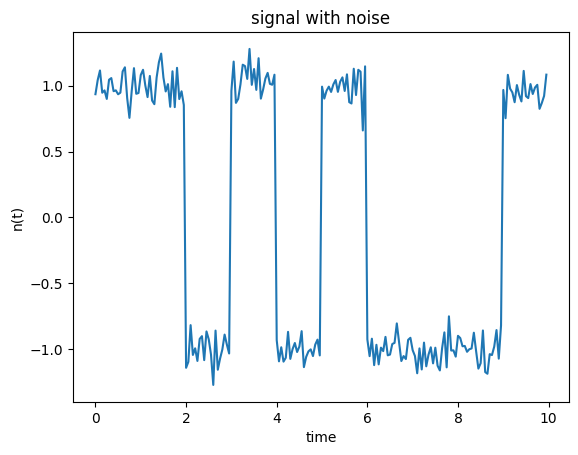

In [13]:
#generate the noise
signal_noise=add_AWGN_noise(signal,len(signal),sigma_noise)

plt.plot(t,signal_noise)
plt.xlabel('time')
plt.ylabel('n(t)')
plt.title('signal with noise')
plt.show()

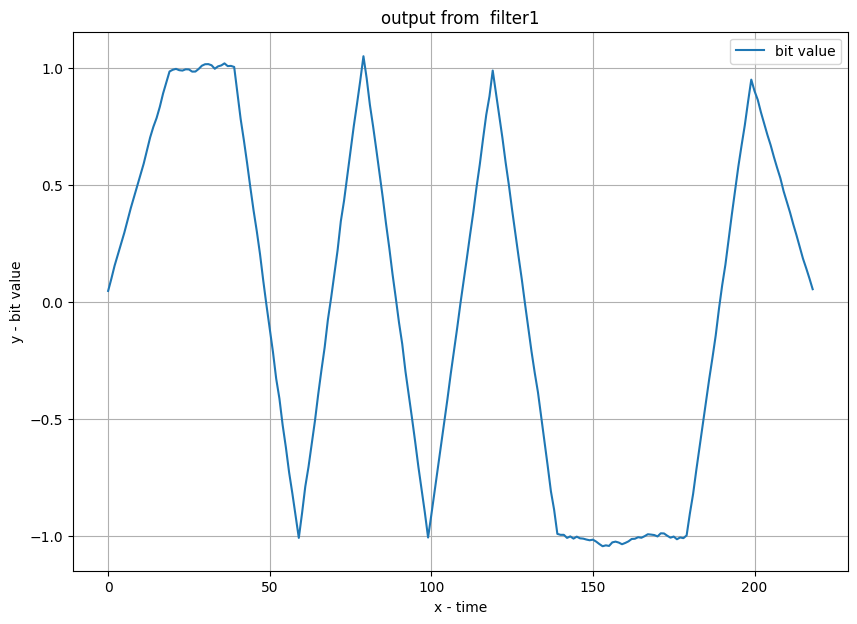

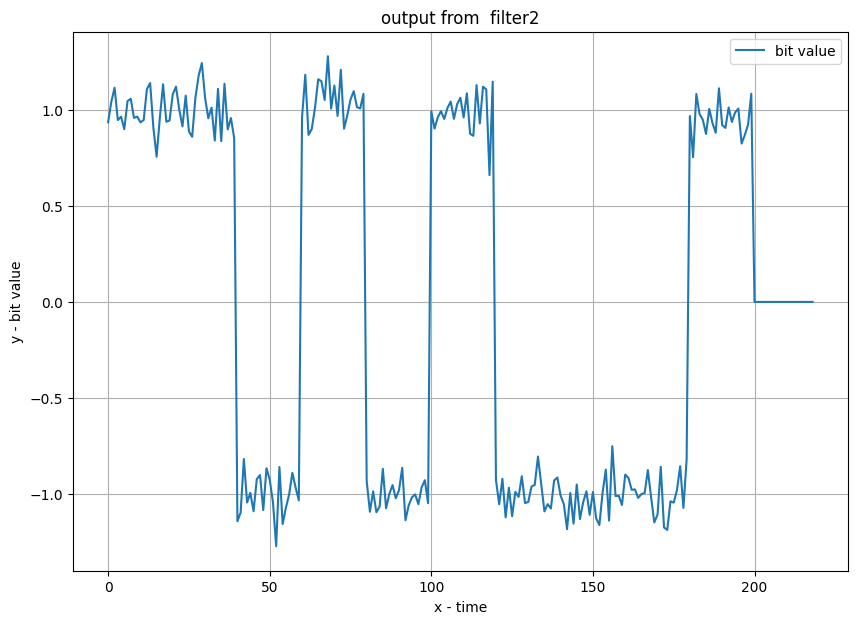

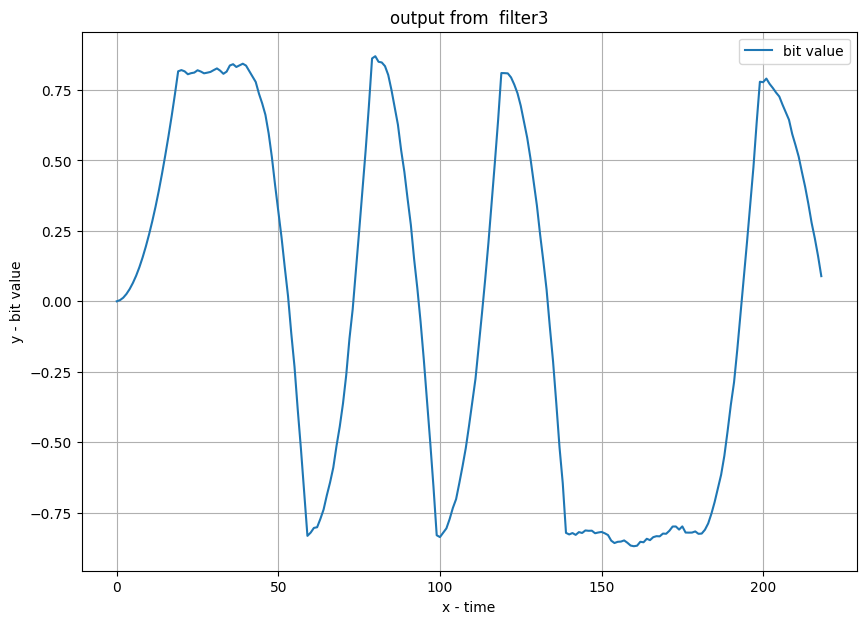

In [14]:
signal_noise_filter_1=receive_filter(signal_noise, 1,step)
signal_noise_filter_2=receive_filter(signal_noise, 2, step)
signal_noise_filter_3=receive_filter(signal_noise, 3, step)
#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, signal_noise_filter_1.flatten().shape[0]), signal_noise_filter_1.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output from  filter1')

plt.legend()
plt.grid()
plt.show()

#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, signal_noise_filter_2.flatten().shape[0]), signal_noise_filter_2.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output from  filter2')

plt.legend()
plt.grid()
plt.show()
#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, signal_noise_filter_3.flatten().shape[0]), signal_noise_filter_3.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output from  filter3')

plt.legend()
plt.grid()
plt.show()

In [15]:
#sample the filtered signal
sampling_period = int(1/step)
samples_1 = sampling(sampling_period, signal_noise_filter_1)
samples_2 = sampling(sampling_period, signal_noise_filter_2)
samples_3 = sampling(sampling_period, signal_noise_filter_3)

Reconstructed Bitstram 1: [1 1 0 1 0 1 0 0 0 1]
Reconstructed Bitstram 2: [1 1 0 1 0 1 0 0 0 1]
Reconstructed Bitstram 3: [1 1 0 1 0 1 0 0 0 1]


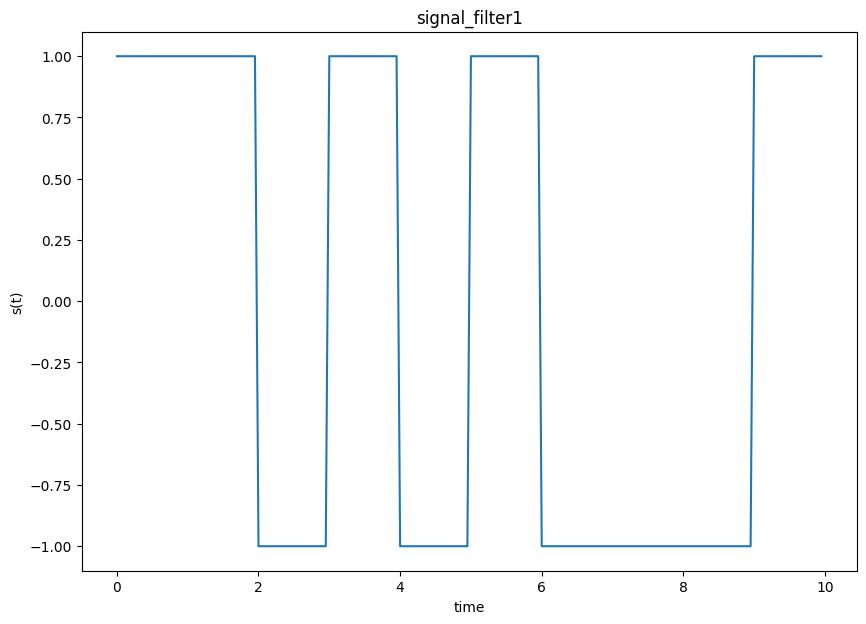

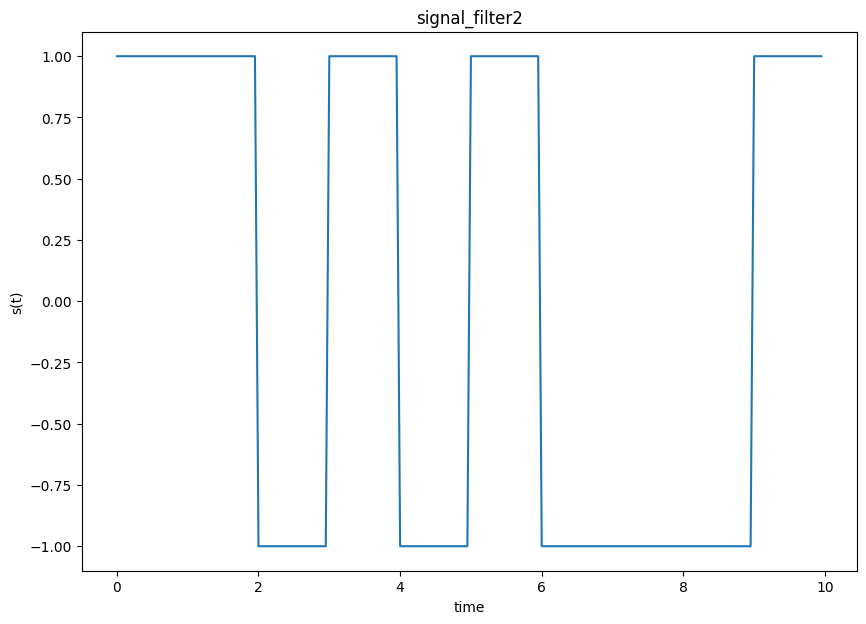

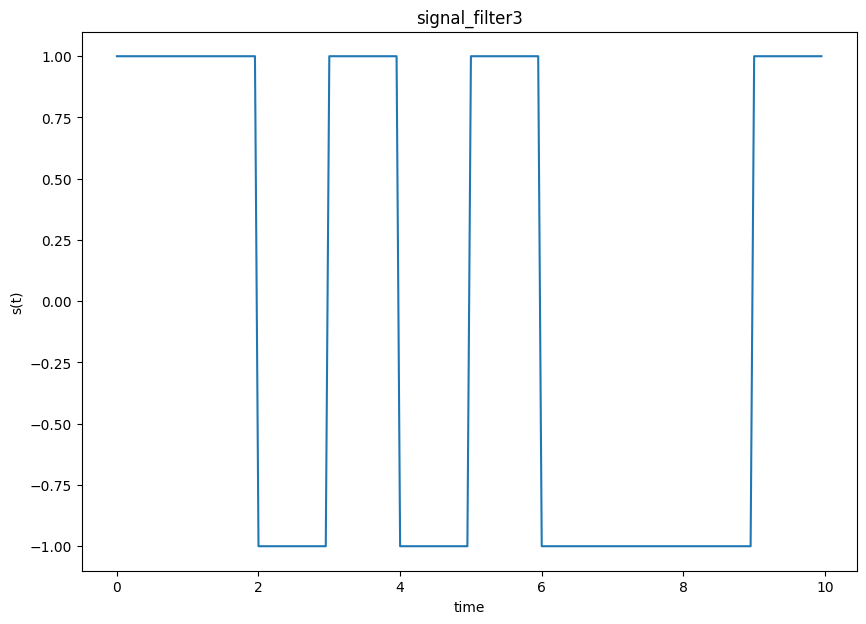

In [16]:
#decode the samples
reconstructed_bitstram_1 = signal_to_binarycode(samples_1, 0)
reconstructed_bitstram_2 = signal_to_binarycode(samples_2, 0)
reconstructed_bitstram_3 = signal_to_binarycode(samples_3, 0)
print('Reconstructed Bitstram 1:',reconstructed_bitstram_1)
print('Reconstructed Bitstram 2:',reconstructed_bitstram_2)
print('Reconstructed Bitstram 3:',reconstructed_bitstram_3)
#ploting
#generate the binary signal
signal_filter1=binarycode_to_signal(reconstructed_bitstram_1,step)
#generate the binary signal
plt.figure(figsize=(10,7))
plt.plot(t,signal_filter1)
plt.xlabel('time')
plt.ylabel('s(t)')
plt.title('signal_filter1')
plt.show()

#ploting
#generate the binary signal
signal_filter2=binarycode_to_signal(reconstructed_bitstram_1,step)
plt.figure(figsize=(10,7))
plt.plot(t,signal_filter2)
plt.xlabel('time')
plt.ylabel('s(t)')
plt.title('signal_filter2')
plt.show()

#ploting
#generate the binary signal
signal_filter3=binarycode_to_signal(reconstructed_bitstram_1,step)
plt.figure(figsize=(10,7))
plt.plot(t,signal_filter3)
plt.xlabel('time')
plt.ylabel('s(t)')
plt.title('signal_filter3')
plt.show()
